<a href="https://colab.research.google.com/github/Anupama22here/CodSoft/blob/main/MOVIE_RATING_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DATA COLLECTION

handling unicodevalueerror:

In [3]:
movie_data= pd.read_csv('/content/IMDb Movies India.csv',encoding='latin-1')
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
movie_data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [5]:
movie_data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [6]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
movie_data.shape

(15509, 10)

In [8]:
#return an array-like object containing the unique values from the 'year' column of the DataFrame
movie_data.Year.unique()

array([nan, '(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)',
       '(2012)', '(2014)', '(2004)', '(2016)', '(1991)', '(1990)',
       '(2018)', '(1987)', '(1948)', '(1958)', '(2017)', '(2020)',
       '(2009)', '(2002)', '(1993)', '(1946)', '(1994)', '(2007)',
       '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)',
       '(1974)', '(2015)', '(2006)', '(1981)', '(1985)', '(2011)',
       '(2001)', '(1967)', '(1988)', '(1995)', '(1959)', '(1996)',
       '(1970)', '(1976)', '(2000)', '(1999)', '(1973)', '(1968)',
       '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)',
       '(1977)', '(1957)', '(1950)', '(1992)', '(1969)', '(1975)',
       '(1947)', '(1972)', '(1971)', '(1935)', '(1978)', '(1960)',
       '(1944)', '(1963)', '(1940)', '(1984)', '(1934)', '(1955)',
       '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)',
       '(1952)', '(1933)', '(1942)', '(1939)', '(1954)', '(1945)',
       '(1961)', '(1965)', '(1938)', '(1941)', '(1931)', 

In [9]:
movie_data.Rating.unique()

array([ nan,  7. ,  4.4,  4.7,  7.4,  5.6,  4. ,  6.2,  5.9,  6.5,  5.7,
        6.3,  7.2,  6.6,  7.3,  7.1,  6.9,  3.5,  5. ,  4.5,  6.4,  4.1,
        4.8,  8.1,  5.5,  6.8,  6.1,  7.7,  5.1,  7.6,  3.1,  3.3,  7.8,
        8.4,  5.2,  4.3,  5.8,  4.6,  7.5,  6.7,  3.6,  3.9,  5.4,  4.2,
        5.3,  3.4,  3. ,  8. ,  6. ,  3.8,  7.9,  2.7,  4.9,  2.4,  3.7,
        3.2,  2.5,  2.8,  2.6,  2.9,  8.2,  8.7,  8.3,  9.3,  8.8,  2.1,
        2.3,  8.5,  8.6,  9. ,  9.6,  1.7,  9.1,  2. ,  1.4,  8.9,  1.9,
        9.4,  9.7,  1.8,  9.2,  1.6, 10. ,  2.2,  1.1])

# DATA PREPROCESSING

In [10]:
movie_data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [11]:
#checking duplicate rows
movie_data.duplicated().sum()

6

# DATA EXPLORATION

In [12]:
print('INFO:',"\n")
print(movie_data.info(),"\n\n\n")
print('summary:',"\n",movie_data.describe,"\n\n\n")
print('nunique:',"\n",movie_data['Genre'].nunique(),"\n\n")
print('unique:',"\n",movie_data['Year'].unique(),"\n\n")
print('Rating.unique:',"\n",movie_data.Rating.unique(),"\n\n")
print('unique:',"\n",movie_data['Duration'].unique(),"\n\n")
print("groupby(['Genre']':","\n",movie_data.groupby(['Genre']).count(),"\n\n")
print("value_counts:","\n",movie_data["Director"].value_counts().head(),"\n\n")
print('isnull().any():',"\n",movie_data.isnull().sum(),"\n\n\n")

INFO: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None 



summary: 
 <bound method NDFrame.describe of                                      Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musi

# VISUALIZING

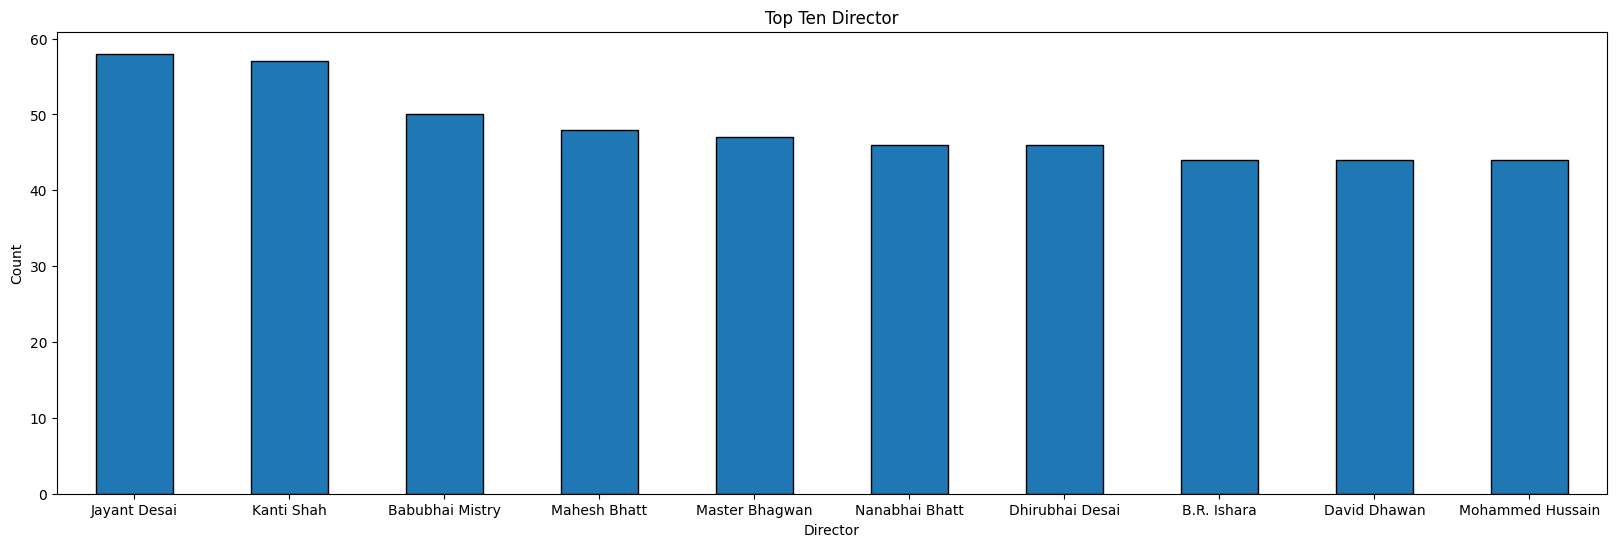

In [19]:
def topten(column): #column takes up any argument to be passed
  global movie_data
  # calculates the frequency of each unique value in the specified column
  # sorts the counts of unique values in descending order,and prints first 10 values
  movie_data[column].value_counts().sort_values(ascending=False)[:10].plot(kind='bar',figsize=(20,6),edgecolor='k')
  plt.xticks(rotation=0)
  plt.title("Top Ten {}".format(column))
  plt.xlabel(column)
  plt.ylabel("Count")
  plt.show
topten("Director")


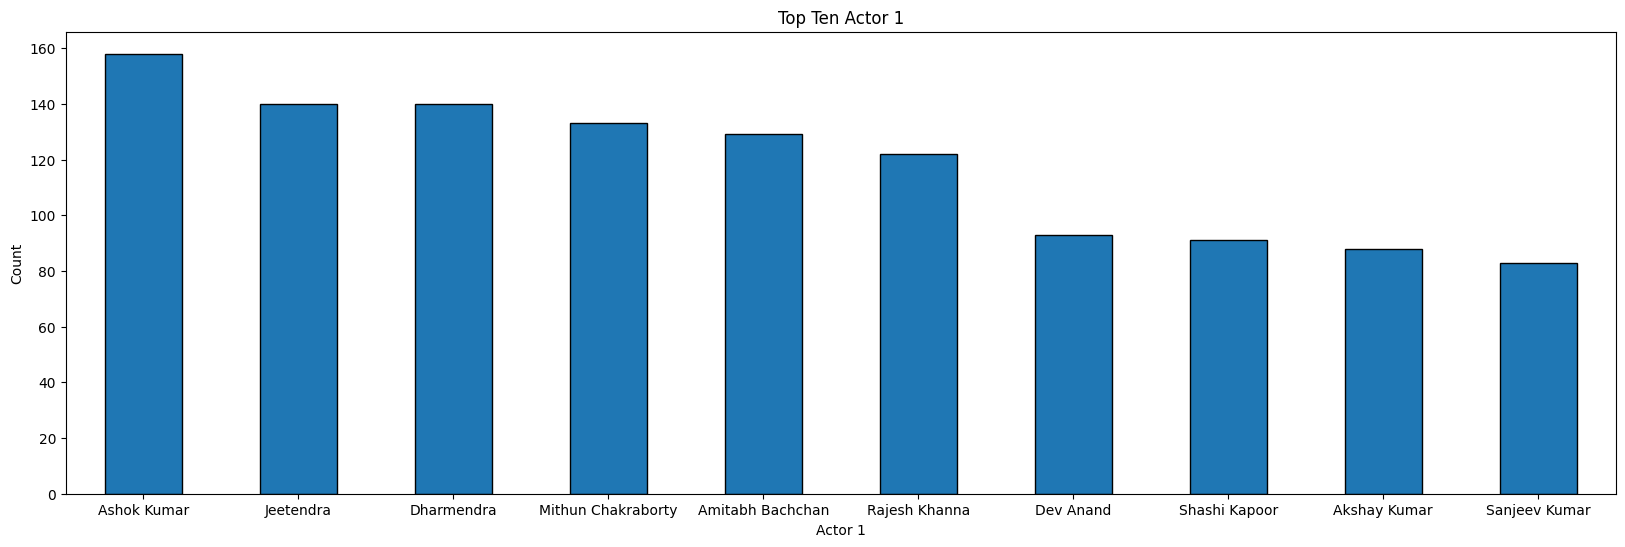

In [20]:
topten("Actor 1")

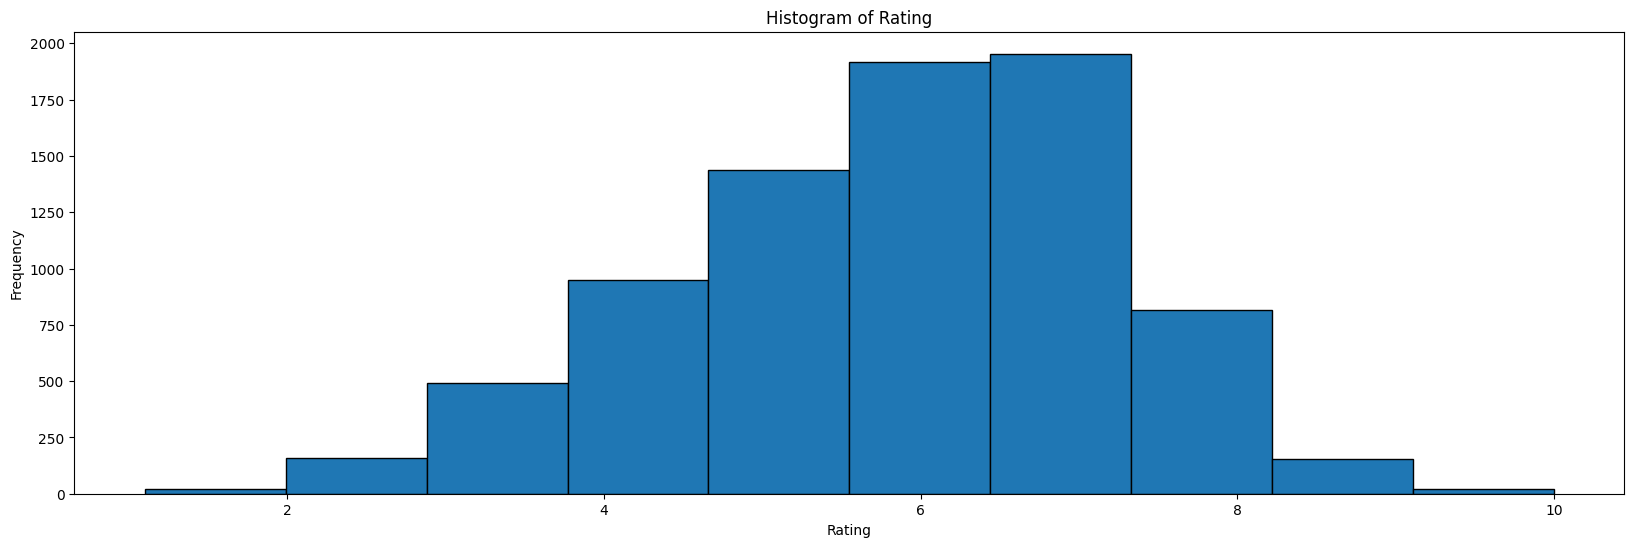

In [29]:
def histogram(column):
  global movie_data
  plt.figure(figsize=(20,6))
  plt.hist(movie_data[column],edgecolor='k')
  plt.title("Histogram of {}".format(column))
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()
histogram("Rating")

In [31]:
def scatter(x,y,c=None):
  global movie_data
  plt.figure(figsize=(20,6))
  plt.scatter(movie_data[x],movie_data[y],edgecolor="k",c=c)
  plt.xticks(rotation=0)
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()

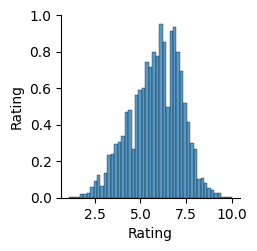

In [33]:
sns.pairplot(movie_data)
#elects only the columns from the movie_data DataFrame that have numeric data types, specifically 'float64' and 'int64' using select_dtype
numeric_columns=movie_data.select_dtypes(include=['float64','int64']).columns
#This line calculates the correlation matrix for the numeric columns in the movie_data
correlation=movie_data[numeric_columns].corr(method='spearman')